### Fase I - Punto 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importar la imagen
import imageio
img = imageio.imread('imagen.jpg')
print(img.shape)
rows = img.shape[0]
columns = img.shape[1]



(1279, 1919, 3)


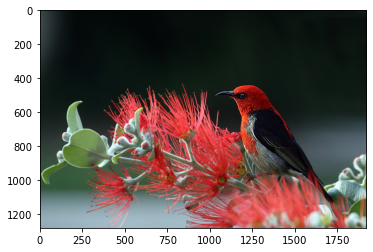

In [3]:
# plotear la imagen
plt.imshow(img)
plt.show()

In [4]:
# funcion que reconstrulle la imagen en base a un numero de componentes
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed

In [5]:
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled

In [6]:
# funcion que regresa las componentes necesarias 
# para un determinado porcentaje de compresion deseado
def get_components(img_full_rep, comp_percentage, rows, columns):
    return (comp_percentage * img_full_rep) / (rows+columns+1)

In [7]:
# representacion de la imagen original
img_full_rep = rows * columns
img_full_rep

2454401

In [8]:
# componetes requeridos para un 33% de compresion
new_components = get_components(img_full_rep, 0.33, rows, columns)
new_components

253.1892247577368

In [9]:
# calculo de la nueva representacion de la imagen
new_img_rep = new_components * rows + new_components + new_components * columns
new_img_rep

809952.3300000001

In [10]:
# relacion de compresion
new_img_rep / img_full_rep

0.33

In [11]:
# reconstruccion de la imagen con 253 componentes
reconstructed = reconstruct(img, 253)


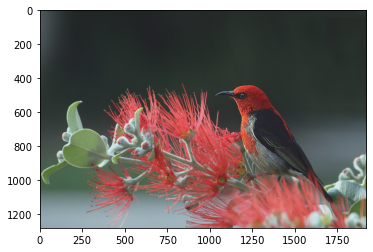

In [12]:
img_rescaled = rescale_img(reconstructed)
plt.imshow(img_rescaled)
plt.show()
